## Ecommerce Data


### Project Over view

As part of a growing e-commerce company, you have been tasked with analyzing product data to
better understand market trends and customer preferences. Your objective is to leverage data science
techniques to enhance the company’s product offerings and marketing strategies. This project will
involve collecting data, performing analysis, and using machine learning to derive actionable
insights.

In [1]:
# 1. Extract Data

# 2. Data Cleaning

# 3. Data Storage

# 4. Unsupervised Learning

# 5. Supervised Learning

# 6. Hyperparameter Tuning

# 7. Documentation and Submission

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('e_commerce Capstone.csv')
df

Product_name Product_category     price  Rating  Number of reviews
0         Mobile         Clothing  10284.60     9.8                115
1     Headphones         Clothing  34732.50     6.9                238
2       Backpack          Kitchen  12708.62     4.4                211
3       Backpack           Beauty  37421.77     5.6                 97
4          Watch      Electronics  99338.41     5.7                 58
..           ...              ...       ...     ...                ...
995  Mobile Case      Electronics  98432.52     2.2                 96
996   Sunglasses      Electronics  31815.67     9.6                215
997   Sunglasses           Sports  33123.92     2.8                311
998        Shoes      Electronics   1170.28     4.7                336
999        Watch      Electronics  70773.61     9.4                355

[1000 rows x 5 columns]

###  Data Cleaning 

In [4]:
df.info()
df.shape
df.isnull().sum()
df.columns.tolist()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_name       1000 non-null   object 
 1   Product_category   1000 non-null   object 
 2   price              1000 non-null   float64
 3   Rating             1000 non-null   float64
 4   Number of reviews  1000 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


price       Rating  Number of reviews
count   1000.00000  1000.000000        1000.000000
mean   49629.95446     5.050200         252.877000
std    28494.38351     2.848177         146.567308
min       36.33000     0.000000           0.000000
25%    25016.23750     2.575000         116.000000
50%    50396.49000     5.000000         254.000000
75%    73200.05250     7.525000         380.000000
max    99930.75000    10.000000         500.000000

In [5]:
print(df.isnull().sum())


df.dropna(inplace=True)

print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.info())

print(df.describe())

Product_name         0
Product_category     0
price                0
Rating               0
Number of reviews    0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_name       1000 non-null   object 
 1   Product_category   1000 non-null   object 
 2   price              1000 non-null   float64
 3   Rating             1000 non-null   float64
 4   Number of reviews  1000 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB
None
             price       Rating  Number of reviews
count   1000.00000  1000.000000        1000.000000
mean   49629.95446     5.050200         252.877000
std    28494.38351     2.848177         146.567308
min       36.33000     0.000000           0.000000
25%    25016.23750     2.575000         116.000000
50%    50396.49000     5.000000         254.000000
75% 

In [6]:
df.shape

(1000, 5)

### Exploratory data analysis (EDA)

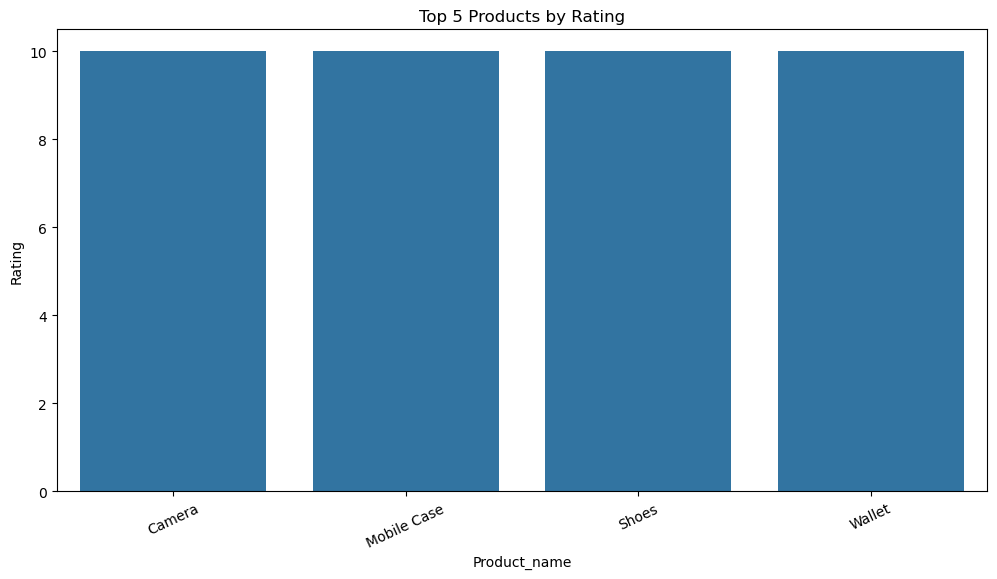

In [7]:
plt.figure(figsize=(12,6))
# Get top 5 products by rating
top5_products = df.sort_values('Rating', ascending=False).head(5)
sns.barplot(data=top5_products, x='Product_name', y='Rating')
plt.title('Top 5 Products by Rating')
plt.xticks(rotation=25)
plt.show()


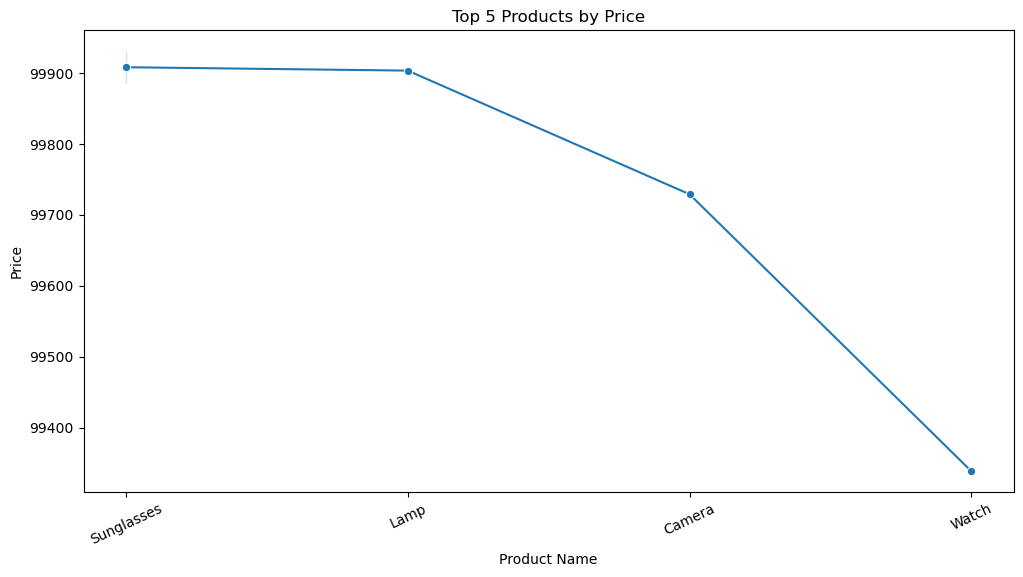

In [8]:
plt.figure(figsize=(12,6))
# Get top 5 products by price
top5_price = df.sort_values('price', ascending=False).head(5)
sns.lineplot(data=top5_price, x='Product_name', y='price', marker='o')
plt.title('Top 5 Products by Price')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=25)
plt.show()


### Data Storage 

In [9]:
# Data Storage  

# Import all lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier




### CONNECT WITH SQL

In [10]:
! pip install mysql
 

Access is denied.


In [11]:
# # import data from SQL 


from sqlalchemy import create_engine

# mysql connection:
username = 'root'
password = 'google'
host = 'localhost'
port = '3306'
database = 'e_commerce capstone'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# write dataframe to mysql:
table_name = 'e_com'
df.to_sql(table_name,engine,if_exists = 'replace',index = False)

# read back sample:
pd.read_sql('select * from e_com limit 5 ',engine)

OperationalError: (pymysql.err.OperationalError) (1049, "Unknown database 'e_commerce capstone'")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [40]:
from sqlalchemy import create_engine
import pandas as pd

# Define your MySQL credentials
username = "root"
password = "google"   # <-- replace with your MySQL password
host = "localhost"
database = "ecommerce_capstone"

# Create engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")


### Unsupervised Learning

In [41]:
x = df.iloc[:,[2,4]].values
x

array([[10284.6 ,   115.  ],
       [34732.5 ,   238.  ],
       [12708.62,   211.  ],
       ...,
       [33123.92,   311.  ],
       [ 1170.28,   336.  ],
       [70773.61,   355.  ]])

### Number of cluster via Elbow Method

c:\Users\ACER\.ipython\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ACER\.ipython\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ACER\.ipython\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ACER\.ipython\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

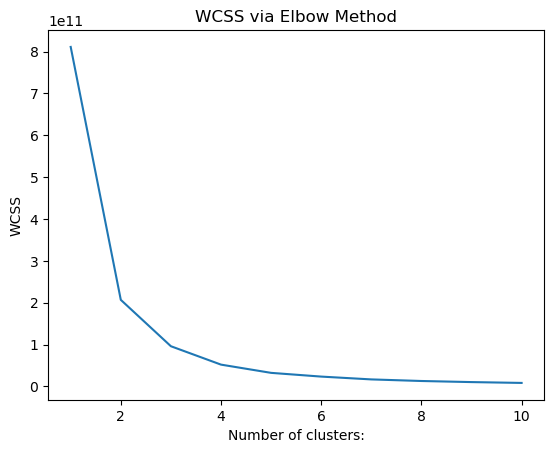

In [42]:
from warnings import filterwarnings

wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++',random_state=21)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters:')
plt.ylabel('WCSS')
plt.show()



In [43]:
# Model Training

model = KMeans(n_clusters=3, init='k-means++', random_state=21)
y_means = model.fit_predict(x)

print("y_means :\n\n", y_means)

y_means :

 [1 1 1 2 0 0 2 0 1 2 1 2 0 0 1 1 0 1 1 2 2 2 2 0 2 0 0 0 0 1 2 1 0 0 0 0 1
 1 2 2 0 2 1 0 0 2 2 1 0 1 0 0 1 0 1 1 2 2 1 1 0 2 1 1 2 1 2 2 1 2 2 2 0 1
 2 0 1 1 2 2 1 2 1 2 0 2 0 2 0 1 1 0 1 0 0 0 1 2 0 0 1 1 1 1 2 0 0 0 1 2 1
 2 1 2 2 2 2 0 2 1 2 2 1 2 0 2 1 2 2 2 2 2 0 2 1 1 0 2 0 0 0 1 0 2 1 0 2 2
 2 0 0 1 2 1 2 2 1 1 1 2 1 2 0 0 1 0 0 1 2 0 2 1 2 1 0 0 0 0 2 2 2 1 2 0 1
 2 0 1 1 0 2 0 1 2 2 0 0 2 2 1 2 0 1 1 2 1 1 2 1 0 2 0 0 2 1 0 1 1 1 2 0 2
 0 1 0 2 0 0 1 1 1 1 1 1 1 2 0 1 2 0 0 0 1 0 0 2 0 0 0 1 2 1 0 2 1 1 2 2 2
 1 2 0 1 2 2 1 1 0 0 0 2 0 1 1 0 2 1 0 1 0 0 0 2 2 0 0 2 1 1 1 0 2 0 1 1 2
 1 1 0 2 2 2 0 1 2 1 2 0 2 1 2 1 1 0 0 2 1 1 0 1 2 1 2 0 1 2 0 2 0 2 2 0 2
 1 2 2 1 1 2 1 1 1 1 1 0 2 0 2 1 1 0 2 0 1 2 0 0 0 1 1 1 0 1 0 1 2 2 1 1 2
 2 1 0 1 2 1 2 2 2 2 1 2 1 2 2 2 2 0 0 1 2 1 1 2 1 1 2 2 0 0 2 0 0 2 1 1 1
 2 2 2 2 2 0 1 2 0 0 0 1 2 1 0 0 1 1 1 0 2 1 2 1 1 0 1 0 2 1 0 2 0 2 1 1 2
 1 2 2 0 1 2 1 1 1 1 1 0 1 0 1 1 2 0 2 2 1 1 2 1 0 0 1 2 0 0 1 2 2 0 2 0 0
 1 1 2 2 2 1 

c:\Users\ACER\.ipython\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [44]:
df.keys()

Index(['Product_name', 'Product_category', 'price', 'Rating',
       'Number of reviews'],
      dtype='object')

### Scatter plot the cluster

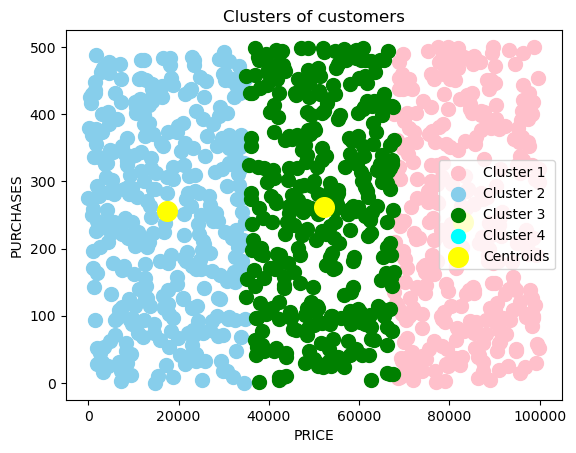

In [45]:
# Scatter plot the clusters

plt.scatter(x[y_means==0,0], x[y_means==0,1], s=100, c='Pink', label='Cluster 1')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s=100, c='skyblue', label='Cluster 2')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_means==3,0], x[y_means==3,1], s=100, c='cyan', label='Cluster 4')   
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=200, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('PRICE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()


### PCA (Principal Component Analysis)
###    Dimensionality Reduction 

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
# # Standard Scaler and PCA

# sc = StandardScaler()
# sc.fit(df)
# scaled_data = sc.transform(df)
# principal = PCA(n_components = 3)
# principal.fit(scaled_data)
# x=principal.transform(scaled_data)
# print(x.shape)




# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import pandas as pd

# # Assuming df is your DataFrame

# # Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# # Apply PCA to reduce dimensionality to 3 components
# pca = PCA(n_components=3)
# principal_components = pca.fit_transform(scaled_data)

# # Print the shape of the transformed data
# print(principal_components.shape)



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Select only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

print(principal_components.shape)


(1000, 3)


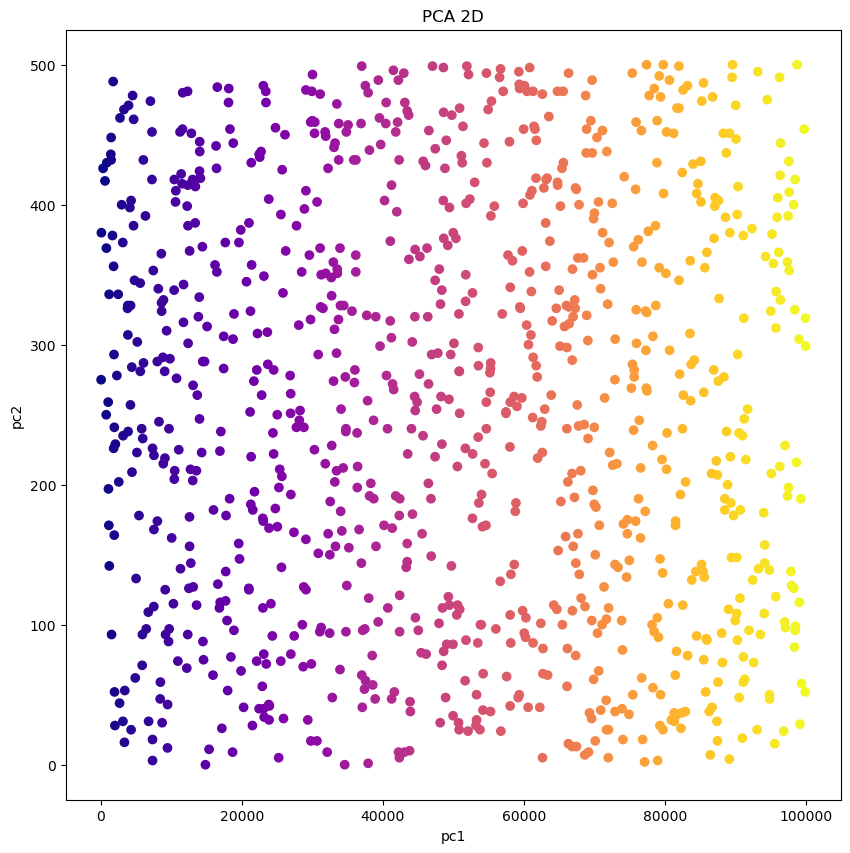

In [48]:
# # Scattering the Cluster

# principal_components
# plt.figure(figsize=(10,10))

# plt.title('PCA 2D')
# plt.scatter(x[:,0],x[:,1], c= df['target'] , cmap= 'plasma')

# plt.xlabel('pc1')
# plt.ylabel('pc2')

# plt.show()



# import matplotlib.pyplot as plt

# # Scattering the Cluster principal_components
# plt.figure(figsize=(10,10))
# plt.title('PCA 2D')
# plt.scatter(x[:,0], x[:,1], c=df.iloc[:, -1], cmap='plasma')  # assuming last column is the target
# plt.xlabel('pc1')
# plt.ylabel('pc2')
# plt.show()


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['price'] = le.fit_transform(df['price']) # target column is product category 

plt.figure(figsize=(10,10))
plt.title('PCA 2D')
plt.scatter(x[:,0], x[:,1], c=df['price'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()



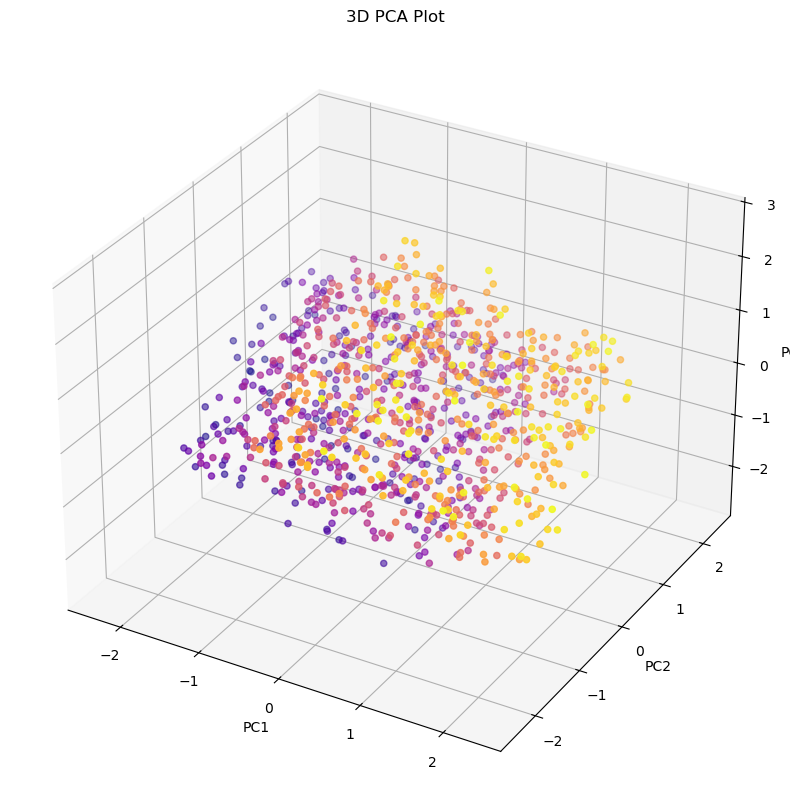

In [49]:
# # 3D model 

# from mpl_toolkits.mplot3d import Axes3D

# fig= plt.figure(figsize= (10,10))

# axis = fig.add_subplot(111, projection = '3d')

# axis.scatter(x[:,0] , x[:,1],x[:,2] , c= df['Product_category'] , cmap= 'plasma')

# axis.set_xlabel('PC1' , fontsize = 10)



from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# axis = fig.add_subplot(111, projection='3d')
# axis.scatter(x[:,0], x[:,1], x[:,2], c=df['Product_category'], cmap='plasma')
# axis.set_xlabel('PC1', fontsize=10)
# axis.set_ylabel('PC2', fontsize=10)
# axis.set_zlabel('PC3', fontsize=10)
# plt.title('3D PCA Plot')
# plt.show()


pca = PCA(n_components=3)
x = pca.fit_transform(scaled_data)

fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:,0], x[:,1], x[:,2], c=df['price'], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)
plt.title('3D PCA Plot')
plt.show()

# Supervised Learnig 

apply various classification algorithms to predict
product categories or other relevant labels based on features.

## • Logistic Regression

In [50]:
df.keys()

Index(['Product_name', 'Product_category', 'price', 'Rating',
       'Number of reviews'],
      dtype='object')

In [51]:
# Model Traning 



y = df['Product_category']

In [52]:
# Train  / Test / Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)

print(f"x-train : {x_train.shape}")
print(f"x-test : {x_test.shape}")
print(f"y-train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

x-train : (800, 3)
x-test : (200, 3)
y-train : (800,)
y_test : (200,)


In [53]:
from sklearn.linear_model import LogisticRegression

# fitting the model

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['Sports', 'Toys', 'Sports', 'Toys', 'Electronics', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Clothing', 'Electronics',
       'Electronics', 'Toys', 'Sports', 'Toys', 'Sports', 'Clothing',
       'Toys', 'Toys', 'Sports', 'Sports', 'Toys', 'Toys', 'Clothing',
       'Electronics', 'Toys', 'Sports', 'Clothing', 'Toys', 'Sports',
       'Electronics', 'Sports', 'Toys', 'Toys', 'Clothing', 'Toys',
       'Electronics', 'Electronics', 'Toys', 'Electronics', 'Toys',
       'Toys', 'Toys', 'Toys', 'Sports', 'Toys', 'Toys', 'Sports', 'Toys',
       'Toys', 'Electronics', 'Sports', 'Toys', 'Sports', 'Toys', 'Toys',
       'Toys', 'Sports', 'Clothing', 'Clothing', 'Clothing', 'Toys',
       'Sports', 'Toys', 'Toys', 'Electronics', 'Toys', 'Toys', 'Toys',
       'Sports', 'Clothing', 'Sports', 'Clothing', 'Sports', 'Toys',
       'Electronics', 'Electronics', 'Toys', 'Electronics', 'Toys',
       'Toys', 'Toys', 'Electronics', 'Sports', 'Sports', 'Toys',
       'Clothing',

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

ValueError: could not convert string to float: 'Electronics'

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model

LinearRegression()

In [14]:
# fitting the model

model =LogisticRegression(random_state=42, max_iter=200)
model.fit(x_train, y_train)


NameError: name 'LogisticRegression' is not defined

In [15]:
# Prediction 

y_pred = model.predict(x_test)
y_pred

NameError: name 'x_test' is not defined

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

import matplotlib as plt

# Confusion Matrix and accuracy  score
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print(f"confusion_matrix:\n{cm}")
print()

print(f"Accuracy_score : {round(accuracy * 100 , 2)}%")
print()

NameError: name 'y_test' is not defined

1. Improve Model Performance: Focus on reducing the number of false positives and false negatives by collecting more data, feature engineering, or using different machine learning algorithms.
2. Cost-Benefit Analysis: Conduct a cost-benefit analysis to determine the costs associated with false positives and false negatives. This will help prioritize model improvement efforts.
3. Monitor Model Performance: Continuously monitor the model's performance on new data and retrain the model as necessary to maintain its accuracy.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()





NameError: name 'cm' is not defined

<Figure size 1000x800 with 0 Axes>

In [18]:

import matplotlib.pyplot as plt
import numpy as np


classes = model.classes_
plt.figure(figsize=(10,8))
for i in range(len(classes)):
    plt.plot([0, len(classes)-1], [i, i], 'k-', alpha=0.3)  # grid lines
    plt.plot([i, i], [0, len(classes)-1], 'k-', alpha=0.3)  # grid lines
    plt.plot(np.arange(len(classes)), cm[i], label=classes[i], marker='o')

plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Line Plot')
plt.legend()
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'classes_'

## • Support Vector Machine (SVM)

In [19]:
# SVM (Support Vector Machine) classifier

from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [20]:
# Prediction using SVM model

y_svm_pred = svm_model.predict(x_test)
y_svm_pred 

NameError: name 'x_test' is not defined

In [21]:

svm_cm = confusion_matrix(y_test, y_svm_pred)
svm_accuracy = accuracy_score(y_test, y_svm_pred)   
print(f"SVM Confusion Matrix:\n{svm_cm}")
print(f"SVM Accuracy Score: {round(svm_accuracy * 100, 2)}%")

NameError: name 'y_test' is not defined

1. Model Performance: The SVM model's accuracy score indicates its ability to correctly classify instances in the test dataset.
2. Comparison with Other Models: Compare the SVM model's performance with other machine learning models to determine which one performs best for this specific problem.

In [22]:




classes = model.classes_
plt.plot(np.diag(cm), marker='*')
plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Classes')
plt.ylabel('Correct predictions')
plt.title('Correct Predictions Line Plot')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'classes_'

## • k-Nearest Neighbors (k-NN)

In [23]:
# KNN (K-Nearest Neighbors) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [24]:
# Prediction


y_knn_pred = knn_model.predict(x_test)
y_knn_pred


NameError: name 'x_test' is not defined

In [25]:
# Confusion Matrix  and Accuracy Score

knn_cm = confusion_matrix(y_test, y_knn_pred)
knn_accuracy = accuracy_score(y_test, y_knn_pred)
print(f"KNN Confusion Matrix:\n{knn_cm}")
print(f"KNN Accuracy Score: {round(knn_accuracy * 100, 2)}%")



NameError: name 'y_test' is not defined


1. K-Fold Cross Validation: Use k-fold cross-validation to evaluate the KNN model's performance on unseen data and avoid overfitting.
2. Comparison with Other Models: Compare the KNN model's performance with other machine learning models, such as logistic regression, decision trees, and SVM, to determine which one performs best for this specific problem.
3. Model Interpretation: Use techniques such as feature importance to interpret the KNN model's predictions and gain insights into the relationships between the features and the target variable.

## • Random Forest

In [26]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)



NameError: name 'x_train' is not defined

In [27]:
# Prediction using Random Forest model

y_rf_pred = rf_model.predict(x_test)
y_rf_pred

NameError: name 'x_test' is not defined

In [28]:
# Confusion Matrix  and Accuracy Score 

rf_cm = confusion_matrix(y_test, y_rf_pred)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Confusion Matrix:\n{rf_cm}")
print(f"Random Forest Accuracy Score: {round(rf_accuracy * 100, 2)}%")

NameError: name 'y_test' is not defined

1. Ensemble Methods: Consider using ensemble methods, such as bagging or boosting, to combine the predictions of multiple models and improve overall performance.
2. Model Comparison: Compare the Random Forest model's performance with other machine learning models, such as gradient boosting or neural networks, to determine which one performs best for this specific problem.
3. Model Deployment: Deploy the Random Forest model in a production environment and monitor its performance on new data.

In [29]:
classes = model.classes_
cm = confusion_matrix(y_test, y_pred)

for i in range(len(classes)):
    plt.plot(cm[i], label=classes[i], marker='*')

plt.xticks(np.arange(len(classes)), classes, )
plt.xlabel('Predicted labels')
plt.ylabel('Number of samples')
plt.title('Confusion Matrix Line Plot')
plt.legend()
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'classes_'

## • XGBoost

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)
print(f"x-train : {x_train.shape}")
print(f"x-test : {x_test.shape}")
print(f"y-train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

NameError: name 'x' is not defined

In [31]:
# Model Building:

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# disable automatic label encoder and set a multiclass eval metric
xg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# fit using the encoded integer labels to match the model's expected classes
xg.fit(x_train, y_train_enc)

NameError: name 'y_train' is not defined

In [32]:
# model prediction

y_xgb_pred = xg.predict(x_test)
y_xgb_pred

NameError: name 'xg' is not defined

In [33]:
# Get predictions and convert them back to team names
y_xgb_pred = xg.predict(x_test)
y_xgb_pred_labels = le.inverse_transform(y_xgb_pred)

# Confusion Matrix and Accuracy Score
xgb_cm = confusion_matrix(y_test, y_xgb_pred_labels)
xgb_accuracy = accuracy_score(y_test, y_xgb_pred_labels)
print(f"XGBoost Confusion Matrix:\n{xgb_cm}")
print(f"XGBoost Accuracy Score: {round(xgb_accuracy * 100, 2)}%")

NameError: name 'xg' is not defined

In [34]:

import matplotlib.pyplot as plt
import numpy as np

classes = model.classes_  # assuming model is your classifier

for i, class_name in enumerate(classes):
    plt.plot(xgb_cm[i], label=f"Actual: {class_name}", marker='o')

plt.xticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted labels')
plt.ylabel('Number of samples')
plt.title('Confusion Matrix Line Plot')
plt.legend()
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'classes_'

## 6. Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [36]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200]
}

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(x_test)
y_pred_labels = le.inverse_transform(y_pred)

xgb_cm = confusion_matrix(y_test, y_pred_labels)
xgb_accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"XGBoost Confusion Matrix:\n{xgb_cm}")
print(f"XGBoost Accuracy Score: {round(xgb_accuracy * 100, 2)}%")

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

1. Model Performance: The XGBoost model's accuracy score indicates its ability to correctly classify instances in the test dataset.
2. Comparison with Other Models: Compare the XGBoost model's performance with other machine learning models to determine which one performs best for this specific problem.
3. Hyperparameter Tuning: Consider tuning the XGBoost model's hyperparameters, such as the learning rate, max depth, and number of estimators, to improve its performance.

## 7. statistical analysis

In [37]:
# What are the mean, median, and standard deviation of the price column?


import pandas as pd

# Calculate descriptive statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_price}")



Mean Price: 49629.95446
Median Price: 50396.490000000005
Standard Deviation of Price: 28494.383510267937


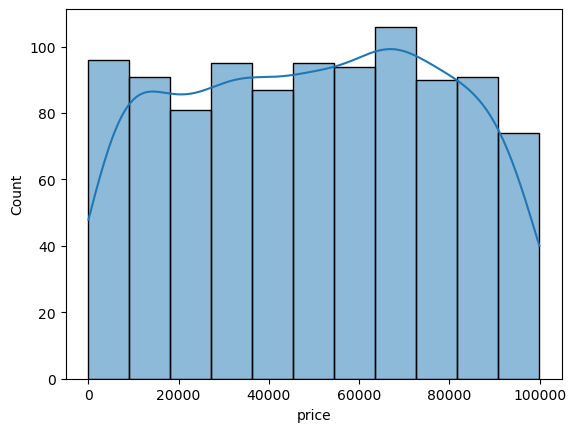

In [38]:
#What is the distribution of the price column?


import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram
sns.histplot(df['price'], kde=True)
plt.show()

In [39]:
# Is there a significant difference in the price of products across different product categories?



from scipy.stats import f_oneway

# Perform ANOVA test
f_stat, p_value = f_oneway(df[df['Product_category'] == 'Category1']['price'],
                          df[df['Product_category'] == 'Category2']['price'],
                          df[df['Product_category'] == 'Category3']['price'])

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: nan
P-Value: nan


C:\Users\ACER\AppData\Local\Temp\ipykernel_17768\4131698234.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(df[df['Product_category'] == 'Category1']['price'],
